# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 5:00 pm on Friday**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

##### A linear model assumes that the outcome variable can be estimated through a linear relationship from the features, that there is little or none multicollinearity between the features, the residues (y-ypred) should be normally distributed, no autocorrelation among residues and homoscedasticity of the residuals - variance of residual is the same for any of the features.

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

##### K Nearest Neighbor is a SUPERVISED machine learning method in which you provide a training data set with features + labels to the algo that is fitted accordingly. Then, when predicting the results on a new sample, the algo will classify it based on the distance to it´s K nearest Neighbours. It can also be used in regression.

##### K-means CLustering is an UNSUPERVISED machine learing method. This method looks at an unlabeled dataset and groups it into K clusters (pre defined by user). It works by starting with K centroids then assigning each point in the dataset to the closest centroid, then recomputing the centroids as the center points for each cluster. It goes on iteratively until it converges or until a stop criteria is defined.

##### So the big difference is that one is a Supervised ML technique used with pre labeled data and the other is an unsupervised technique where there is no pre-labeled data. They are used in different contexts with different purposes.

#### How do you address overfitting?

##### Overfitting can be addressed in several ways, namely:

##### - Get more data/increase training data size. Namely if we have many features and the number of features is comparable to the nb. of samples, then getting more data if possible will almost surely help in reducing variance, .i.e, reducing overfitting.

##### - Trying a smaller set of features if possible. Too many features can introduce excessive complexity in the ML model. If possible, and the removed features all well selected, this could reduce overfitting without hurting the model performance.

##### - Use regularization/ increase regularization parameter. Regularization can help in "smoothing" the model, so providing a less non linear decision boundary.

#### Explain Naive Bayes algorithms.

##### Family of Supervised ML algos that are based on Bayes Rule. They are popular in text classification problems. In broad terms each word is vectorized and each feature is binary(present/not present) (Bernoulli) or a count (Multinomial).Then classification of the text is done based on the results of the NB training.

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

##### ROC (receiver operating characteristic) curve is a curve that plots the True Positive Rate(Recall) - TP/(TP+FN) versus False Positive Rate - FP/(TN+FP). So the ideal points will have the Highest possible TPR and the lowest possible FPR.

##### AUC (area under the curve) is the ares below the ROC curve. The bigger the area, the better the perfoamnce of the model.

##### These metrics can be used to compare the performance of different models. Namely, since they are taking into account FP and FN in addition to simple accuracy then can be very useful in giving quick insight on which model to choose.

#### What is cross validation?

##### Cross Validation is a technique that consists in using different test/train splits when training/testing a Sup. ML model. In an nutshell, after the train/test % split is defined, different test/trainings splits of the data with that % are defined and the model is trained on each one. Then the performance results are averaged. It provides more robust results because:

##### 1)The accuracy score of a supervised learning method can vary, depending on which samples happen to end up in the training set.
##### 2)  Using multiple train-test splits gives more stable and reliable estimates for how the classifier is likely to perform on average.

##### 3)–Results are averaged over multiple different training sets instead of relying on a single model trained on a particular training set.

#### What are confounding variables?

##### A confounding variable influences both the independent variable and dependent variable. Being unaware of or failing to control for confounding variables may cause the researcher to analyze the results incorrectly. The results may show a false correlation between the dependent and independent variables, leading to an incorrect rejection of the null hypothesis.

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

##### I would start by checking:
##### - Did it really dissapeared or just changed names (maybe it just changed names or there were tweaks in the way it´s calculated and they decided to rename it?
##### - Is the metric independent or derived from other data in the data source (so we can quickly obtain it again)
##### - Check who calculates obtains the metric and ask them
##### - Check how the data is obtained - maybe something changed in the chain and the metric is missing because of that.

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

#### Library Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data Import

In [2]:
ds = pd.read_csv('housing_prices.csv', index_col = 0)
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
ds.dtypes.head(50)

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical      

#### Data Cleaning

In [4]:
ds.shape

(1460, 80)

In [5]:
nulls = ds.isnull().sum()
nulls[nulls!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Droping all columns with more than 40% Nulls
print(ds.shape[0]*0.4)
ds2 = ds.drop(['Alley','PoolQC','Fence','MiscFeature', 'FireplaceQu'], axis =1) 
ds2.shape

584.0


(1460, 75)

###### Checking below the Garage columns since the number of missing values is the same for all of them. Since the shape of all the conditions at the same time is still 81 lines we conclude that these missing values all occur in these lines. I could either delete these lines (5.54% of the DS) or delete the features. Since Garage Finish, Condition, Year of Build, Type, Qual all seem not to determinant features in a price, my option is to keep the lines and drop these columns.

In [7]:
ds2[(ds2.GarageType.isnull()) & (ds2.GarageYrBlt.isnull()) \
    & (ds2.GarageFinish.isnull()) & (ds2.GarageQual.isnull()) & (ds2.GarageCond.isnull())].shape

(81, 75)

In [8]:
ds2.drop(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis = 1, inplace=True)

###### Same reasoning as before for the Basement columns. Again same option, but here number of lines is less representative making the choice harder. Will still drop the features, since we have more represetative data like basement area that should have more impact on the price.

In [9]:
ds2[(ds2.BsmtQual.isnull()) & (ds2.BsmtCond.isnull()) \
    & (ds2.BsmtExposure.isnull()) & (ds2.BsmtFinType1.isnull()) & (ds2.BsmtFinType2.isnull())].shape

(37, 70)

In [10]:
ds2.drop(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], axis = 1, inplace=True)

###### As for Lot Frontage after looking at civil eng technical docs to know what it is, I find it is an important feature:
###### frontage in a commercial sense, larger is always more valuable. A lot can be long, or it can be wide – but if you want maximum exposure when it comes to advertising a business, you’ll want a wide building, not a long (or deep) one. A large amount of frontage means larger signs and possibly more storefront or window display area and the possibility of signage
###### However, it has a non linear(spearman) correlation with Lot Area that is relatively high. Also there are categorical variables which help to define the lot and indrectly the frontage. Overall, the altenative is the fill the variable with something (like the mean or inference from other columns) or just drop it. All things considered, will drop it, since inference might distort the DS (it´s 18&% of the DS) and the added value of the column to the price is probably not worth it. I know, I know, a lot of statistical testing could be done here to prove/disprove, but have better things to do :)

In [11]:
ds2.drop(['LotFrontage'], axis = 1, inplace=True)

In [12]:
ds2[(ds2.MasVnrType.isnull()) & (ds2.MasVnrArea.isnull())].shape

(8, 64)

###### remaining missing values represent 9 lines in 1460, 0.6% so will just drop the rows

In [13]:
ds2.dropna(inplace=True)
ds2.shape

(1451, 64)

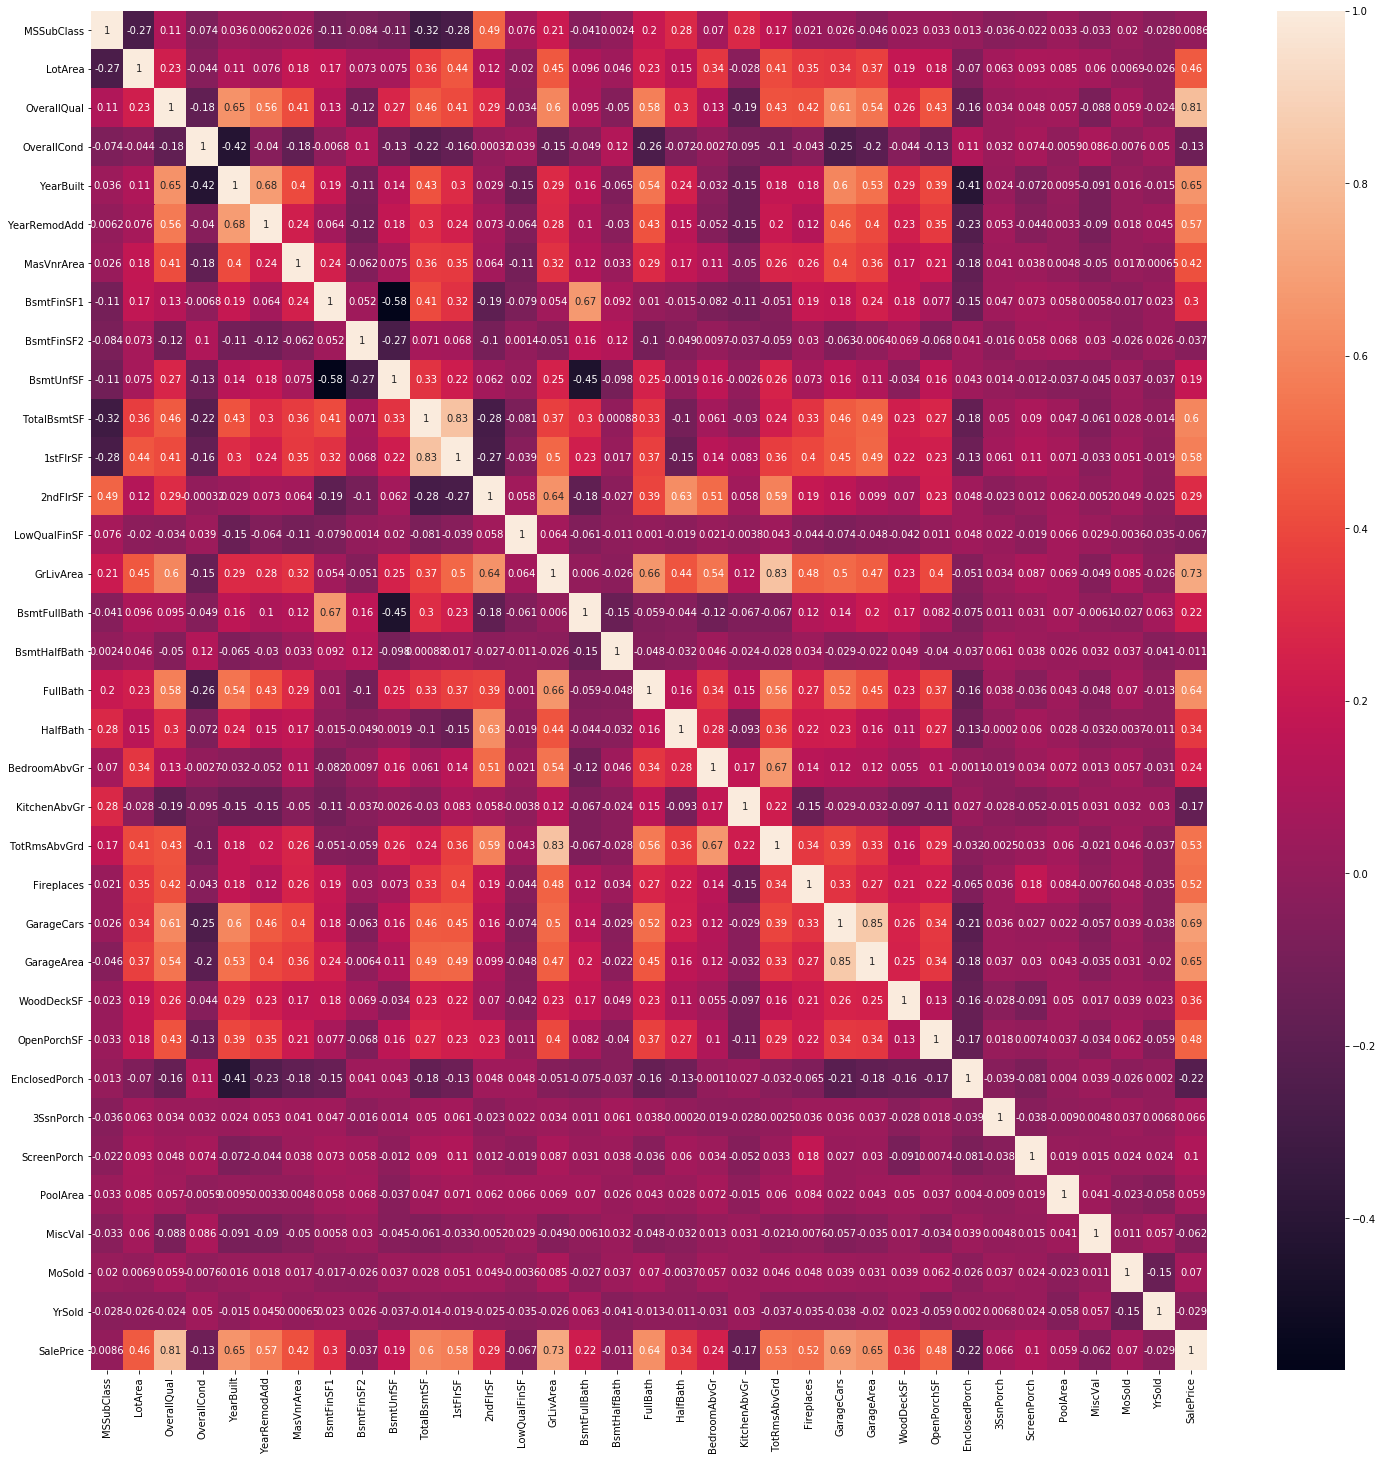

In [14]:
fig, ax = plt.subplots(1,1, figsize = (25,25))

sns.heatmap(ds2.corr(method='spearman'), annot = True)
plt.show()

###### garage cars and garage area have high colinearity, will drop garage cars
###### Total BsmtSF and 1stFlrSF have high colinearity, will drop 1stFlrSF
###### GrLivArea and TotRmsAbvGrd have high colinearity, will drop TotRmsAbvGrd

In [15]:
ds2.drop(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd'], axis = 1, inplace = True)

In [16]:
for col in ds2.columns:
    if ds2[col].dtype == 'object':
        print(col, len(ds2[col].unique())

SyntaxError: unexpected EOF while parsing (<ipython-input-16-1999dc8c0cd4>, line 3)

##### As the categorical columns all have a limited number of values will convert them all to numerical

In [ ]:
ds3 = pd.get_dummies(ds2)
print(ds3.shape)

##### Computational considerations - probably so many features will make this model slow on a small PC like mine, so will remove some more features. For simplicity purposes will exclude features that have a correlation below 0.15 with the target variable.

In [ ]:
c = ds3.corr(method='spearman')
ds3.drop(list(c[abs(c.SalePrice)<0.15].index), axis =1, inplace = True)
ds3.shape

##### Outliers - will check the features that appear to have higher correlation with the outcome variable for outliers

In [ ]:
cor_ds3 = ds3.corr()
for col in cor_ds3.columns:
    if abs(cor_ds3['SalePrice'][col]) > 0.7:
        print(col,cor_ds3['SalePrice'][col] )

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20,10))

axs[0].scatter(ds3['GrLivArea'], ds3['SalePrice'])
axs[0].set_ylabel('SalePrice', fontsize=13)
axs[0].set_xlabel('GrLivArea', fontsize=13)

axs[1].scatter(ds3['OverallQual'], ds3['SalePrice'])
axs[1].set_ylabel('SalePrice', fontsize=13)
axs[1].set_xlabel('OverallQual', fontsize=13)

plt.show()

##### Two points are completely out of the distribution at the right side of x axis - will be removed.

In [ ]:
ds3 = ds3[ds3.GrLivArea < 4500]

### 

### Machine Learning Modeling

#### Import Models, Metrics,...

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Separate dataset in Features and Variable to predict

X = ds3.drop('SalePrice', axis=1)
y = ds3.SalePrice

##### Scaling features to ensure they are in the same range

In [ ]:
scaler = RobustScaler()
X_sc = scaler.fit_transform(X)

##### Test Train Split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_sc, y, test_size=0.3, random_state = 0)

##### Linear Regression 

In [ ]:
mse_lr = []

for k in range(1,5):
    print(k)
    poly_model = make_pipeline (PolynomialFeatures(k), LinearRegression())
    model = poly_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_lr.append(mean_squared_error(y_test, y_pred))

mse_lr

In [ ]:





mse_scorer = make_scorer(mean_squared_error)

clf = make_pipeline(RobustScaler(), GridSearchCV(PolynomialFeatures(), scoring=mse_scorer,
                                 param_grid={'degree': np.arange(1,10)}, \
                                 cv=5, refit=True), LinearRegression())

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#mae_lr = mean_absolute_error(y_test, y_pred)
#mse_lr = mean_squared_error(y_test, y_pred)
#R2_lr = r2_score(y_test, y_pred)



In [ ]:
lr_cv.get_params().keys()